<a href="https://colab.research.google.com/github/abdala9512/nlp-evaluacion-problemas-sociales/blob/main/RNN_to_select_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformation Selecction**
### One Hot Encoding Transformation

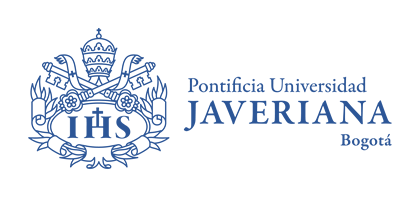

#### **Integrantes:**
- Omar Balcero
- Miguel Arquez
- Leonardo Espitia
- Laura Peñaranda

In [1]:
## Libraries Reading

import pandas as pd
import numpy as np
from google.colab import drive

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def rnn_simple(hiden_units, dense_units, input_dim, activation, loss_metric, optimizer, X_train, y_train,epocas):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(hiden_units, input_dim = input_dim,activation=activation[0]))
  model.add(keras.layers.Dense(units=dense_units, activation=activation[1]))
  model.compile(loss=loss_metric, optimizer =optimizer)

  model.fit(X_train, y_train, epochs= epocas, verbose=0)
  return model

def get_accuracy(X_test, y_test, model):
  pred = model.predict_step(np.array(X_test))
  metric = keras.metrics.CategoricalAccuracy()
  metric.update_state(y_test,pred)
  return metric.result().numpy()


## Word 2 Vec

In [23]:
# W2V
W2V = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PNL202202/Proyecto Final/input_leo_cbow_2.csv', index_col = 0)

In [24]:
y = keras.utils.to_categorical(W2V['TIPO'].apply(lambda x: 0 if x=='Problem' else (1 if x=='Cause' else 2)))
X = W2V.drop(['TIPO'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
W2V_model = rnn_simple(20, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.01),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, W2V_model))
print('Acc in test = ', get_accuracy(X_test, y_test, W2V_model))

Acc in train =  0.7786516
Acc in test =  0.76678175


In [28]:
W2V_model = rnn_simple(20, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.001),
                       np.array(X_train), y_train,
                       50)

print('Acc in train = ', get_accuracy(X_train, y_train, W2V_model))
print('Acc in test = ', get_accuracy(X_test, y_test, W2V_model))

Acc in train =  0.7688693
Acc in test =  0.765631


In [30]:
W2V_model = rnn_simple(300, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.01),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, W2V_model))
print('Acc in test = ', get_accuracy(X_test, y_test, W2V_model))

Acc in train =  0.79418814
Acc in test =  0.78596085


## One Hot Encoding

In [ ]:
# One Hot Encoding
OHE = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PNL202202/Proyecto Final/OHE_SinStopWords.csv').fillna(0)

In [4]:
y = keras.utils.to_categorical(OHE['TIPO'].apply(lambda x: 0 if x=='Problem' else (1 if x=='Cause' else 2)))
X = OHE.drop(['TIPO'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
OHE_model = rnn_simple(20, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.01),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, OHE_model))
print('Acc in test = ', get_accuracy(X_test, y_test, OHE_model))

Acc in train =  0.7547749
Acc in test =  0.54702497


In [6]:
OHE_model = rnn_simple(20, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.001),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, OHE_model))
print('Acc in test = ', get_accuracy(X_test, y_test, OHE_model))

Acc in train =  0.77387464
Acc in test =  0.5573896


In [12]:
OHE_model = rnn_simple(500, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.01),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, OHE_model))
print('Acc in test = ', get_accuracy(X_test, y_test, OHE_model))

Acc in train =  0.7731068
Acc in test =  0.5566219


## Skip Gramms

In [42]:
# SG
# SG = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PNL202202/Proyecto Final/input_omar_sg_2.csv', sep=';')
SG = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/PNL202202/Proyecto Final/input_omar_sg.xlsx')

In [45]:
y = keras.utils.to_categorical(SG['TIPO'].apply(lambda x: 0 if x=='Problem' else (1 if x=='Cause' else 2)))
X = SG.drop(['TIPO'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
SG_model = rnn_simple(20, 3, 
                       X_train.shape[1], 
                       ['relu','softmax'], 
                       keras.losses.categorical_crossentropy, 
                       keras.optimizers.Adam(learning_rate=0.01),
                       np.array(X_train), y_train,
                       100)

print('Acc in train = ', get_accuracy(X_train, y_train, SG_model))
print('Acc in test = ', get_accuracy(X_test, y_test, SG_model))

Acc in train =  0.820562
Acc in test =  0.8185654


In [48]:
SG_model = rnn_simple(20, 3, 
                      X_train.shape[1], 
                      ['relu','softmax'], 
                      keras.losses.categorical_crossentropy, 
                      keras.optimizers.Adam(learning_rate=0.001),
                      np.array(X_train), y_train,
                      100)

print('Acc in train = ', get_accuracy(X_train, y_train, SG_model))
print('Acc in test = ', get_accuracy(X_test, y_test, SG_model))

Acc in train =  0.8164381
Acc in test =  0.80859226


In [49]:
SG_model = rnn_simple(300, 3, 
                      X_train.shape[1], 
                      ['relu','softmax'], 
                      keras.losses.categorical_crossentropy, 
                      keras.optimizers.Adam(learning_rate=0.01),
                      np.array(X_train), y_train,
                      100)

print('Acc in train = ', get_accuracy(X_train, y_train, SG_model))
print('Acc in test = ', get_accuracy(X_test, y_test, SG_model))

Acc in train =  0.84856623
Acc in test =  0.837361
